<a href="https://colab.research.google.com/github/Clinda02/text_data_analysis/blob/main/study/text_data_analysis_sna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# networkx의 기본 사용법 살펴보기

In [1]:
import networkx as nx

# 네트워크 생성
g = nx.Graph()

# 노드 생성
g.add_node(1)
g.add_nodes_from([1, 2, 3, 4, 5, 6]) # 중복으로 추가해도 에러 없음

# 노드 정보 확인
g.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [2]:
# 노드와 노드 연결(엣지 생성)
g.add_edge(1,3)  # 하나의 엣지 생성
g.add_edges_from([(1,3), (2,4), (2,5), (2,6), (3,4), (4,6), (5,6)])  # 여러 개의 엣지를 한꺼번에 생성할 때

# 엣지 정보 확인
g.edges()

EdgeView([(1, 3), (2, 4), (2, 5), (2, 6), (3, 4), (4, 6), (5, 6)])

In [3]:
#노드 수
print(g.number_of_nodes())

6


In [4]:
#엣지 수
print(g.number_of_edges())

7


In [5]:
len(g.edges())

7

In [6]:
#노드의 속성 설정
g.nodes[1]['gender']='male'
g.nodes[2]['gender']='female'
g.nodes[3]['gender']='male'
g.nodes[4]['gender']='female'
g.nodes[5]['gender']='male'
g.nodes[6]['gender']='male'

#노드의 속성 출력
print(nx.get_node_attributes(g, 'gender'))

{1: 'male', 2: 'female', 3: 'male', 4: 'female', 5: 'male', 6: 'male'}


In [7]:
#노드 간의 연결 강도 설정
g[1][3]['weight'] = 3
g[2][4]['weight'] = 1
g[2][5]['weight'] = 4
g[2][6]['weight'] = 3
g[3][4]['weight'] = 2
g[4][6]['weight'] = 3
g[5][6]['weight'] = 4

print(nx.get_edge_attributes(g, 'weight'))

{(1, 3): 3, (2, 4): 1, (2, 5): 4, (2, 6): 3, (3, 4): 2, (4, 6): 3, (5, 6): 4}


In [8]:
#노드 4와 연결된 노드
g[4]

AtlasView({2: {'weight': 1}, 3: {'weight': 2}, 6: {'weight': 3}})

In [9]:
#노드 4와 연결된 노드 수
len(list(g.neighbors(4)))

3

In [10]:
#노드 4와 연결된 노드 수
g.degree(4)

3

In [11]:
#노드 4와 노드 2간의 연결 강도
g[4][2]

{'weight': 1}

In [12]:
#그래프의 연결
nx.degree(g)

DegreeView({1: 1, 2: 3, 3: 2, 4: 3, 5: 2, 6: 3})

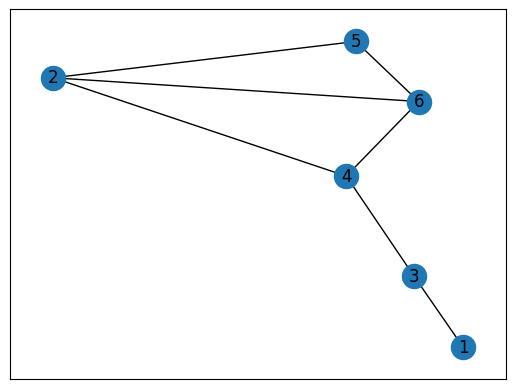

In [13]:
#그래프 시각화
import matplotlib.pyplot as plot
nx.draw_networkx(g)
plot.show()

In [14]:
#연결중심성
nx.degree_centrality(g)

{1: 0.2,
 2: 0.6000000000000001,
 3: 0.4,
 4: 0.6000000000000001,
 5: 0.4,
 6: 0.6000000000000001}

In [15]:
#매개중심성
nx.betweenness_centrality(g)

{1: 0.0,
 2: 0.15000000000000002,
 3: 0.4,
 4: 0.6000000000000001,
 5: 0.0,
 6: 0.15000000000000002}

In [16]:
#근접중심성
nx.closeness_centrality(g)

{1: 0.38461538461538464,
 2: 0.625,
 3: 0.5555555555555556,
 4: 0.7142857142857143,
 5: 0.45454545454545453,
 6: 0.625}

# SNA 실습

## step0- 사전 환경 셋팅


*   konlpy, WordCloud 설치
*   한글 폰트 설치

In [17]:
# konlpy 설치
!pip install konlpy

In [18]:
# konlpy가 정상적으로 설치되었는지 확인
from konlpy.tag import Okt

okt = Okt()
okt.nouns('이 노트북은 의미 연결망 분석 실습을 합니다.')

['이', '노트북', '의미', '연결', '망', '분석', '실습']

In [19]:
# 워드 클라우스 설치
!pip install WordCloud

In [20]:
# 한글폰트 설치
# 폰트 설치 완료 후, [런타임 > 런타임 다시 시작] 진행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [21]:
# 'Nanum'이라는 단어가 들어간 폰트 출력
import matplotlib.font_manager as fm
fonts = fm.findSystemFonts()
[f for f in fonts if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf']

In [22]:
text = '''따지고 보면 클래식 음악계만큼 남성 중심적인 분야도 없다. 정치권은 물론 재계에서도 ‘여풍(女風)’이 분 지 오래지만, 클래식 음악계는 아직도 20세기다. 이렇다 할 여성 지휘자도, 작곡가도 없다. 세계적인 오케스트라는 하나같이 ‘남자 지휘자’가 ‘남자 악장’과 손발을 맞춰 ‘남자 위주의 단원’들을 이끄는 구조다.

100년 넘게 이어져온 이런 남성 중심의 오케스트라 시스템에 변화의 바람이 불고 있다. 세계 최고 오케스트라로 꼽히는 베를린 필하모닉은 사상 처음 여성 악장을 임명했고, 미국의 명문 관현악단인 뉴욕 필하모닉은 180년 역사상 처음으로 여성 단원 수가 남성보다 많게 재편했다. 전문가들은 “사회 전반을 휩쓴 남녀평등, 여권 신장 등의 이슈가 이제야 클래식 음악계에 닿은 것”이라며 “세계적인 오케스트라를 이끄는 여성 상임 지휘자가 나올 날도 머지않았다”는 전망을 내놨다.
19일 외신에 따르면 베를린 필하모닉은 지난 17일 라트비아 출신 바이올리니스트 비네타 사레이카를 악장으로 임명했다. 베를린 필이 여성 악장을 임명한 건 1882년 설립 이후 처음이다. 악장은 단원 전체를 통솔하고 지휘자를 보조하는 중요한 자리다. 전체적인 소리의 균형을 맞추는 것도, 지휘자에게 곡의 해석과 연주 방향에 대한 의견을 제시하는 것도 악장 몫이다. 지휘자가 선생님이라면 악장은 반장인 셈이다. 그래서 악장에겐 지휘자와 함께 무대 뒤 개인 대기실을 쓸 수 있도록 예우해준다.

사레이카가 베를린 필의 ‘1호 여성 악장’ 타이틀을 갖게 된 건 그만한 경력을 갖췄기 때문이다. 그는 파리국립고등음악원을 거쳐 퀸 엘리자베스 음악 채플에서 세계적인 바이올리니스트 오귀스탱 뒤메이를 사사했다. 2012년부터 2021년까지 유명 실내악단 아르테미스 콰르텟의 연주자로 활약하며 뛰어난 연주력과 리더십, 앙상블 역량을 인정받았다. 지난해부터 베를린 필에서 연주해온 그는 올해 ‘제1바이올린 콘서트마스터 오디션’에서 우승했다.

베를린 필의 라이벌인 빈 필하모닉은 한 발 빨랐다. 2011년 불가리아 출신 바이올리니스트 알베나 다나일로바를 사상 첫 여성 악장으로 뽑았다. 독일 명문 오케스트라 베를린 슈타츠카펠레는 2017년 최초의 동양인·여성 악장으로 한국인 바이올리니스트 이지윤을 임명했다.

그동안 전통 있는 오케스트라들은 여성을 꺼렸다. 출산과 육아로 인해 최상의 연주 실력을 유지할 수 없다는 게 이유였다. 그래서 빈 필은 1996년까지는 여성에게 입단 오디션을 허용하지 않았다. 베를린 필은 1982년에야 여성 단원을 뽑았다. 이랬던 전통의 오케스트라들이 사회 변화에 맞춰 변신하고 있는 것이다.

오케스트라에 부는 여풍은 몇몇 여성 실력자를 악장으로 임명한 것에 그치지 않는다. 단원 성비가 바뀌는 등 근본적인 오케스트라 구성에 변화가 생기고 있다. 뉴욕 필하모닉은 작년 11월을 기점으로 여성 단원(45명)이 남성(44명)보다 많아졌다. 창단 180년 만에 처음 있는 일이다. 1970년대부터 연주자의 성별과 인종을 보지 않고 오직 연주 실력으로만 평가하는 블라인드 오디션을 도입하면서 오케스트라의 다양성을 확보했다는 평가다.

한국에선 오래전부터 양적인 측면에서 여성 단원이 남성을 압도했다. 국내 양대 오케스트라인 서울시향(남 31명·여 59명)과 KBS교향악단(남 28명·여 60명) 모두 여성 단원이 남성보다 두 배 많다. 음악을 전공하는 여성이 남성보다 훨씬 많다 보니 자연스럽게 여초 현상이 생겼다. 하지만 질적인 측면에선 여전히 남성 위주다. 여성이 음악감독(상임지휘자)을 맡은 오케스트라는 많지 않다. 성시연(47·경기 필하모닉), 여자경(53·강남 심포니) 정도다. 해외에서도 조앤 팔레타(69·버지니아 심포니, 버펄로 필하모닉), 마린 올솝(67·볼티모어, 상파울루 심포니), 미르가 그라지니테 틸라(37·영국 버밍엄시 심포니) 등 손에 꼽힐 정도다.

클래식 음악계 관계자는 “보수적인 클래식 음악계도 여풍이란 대세를 거스를 수는 없을 것”이라며 “시간이 걸리겠지만 해외는 물론 국내에서도 주요 오케스트라를 이끄는 여성 지휘자가 나올 가능성이 높다”고 말했다.'''

## step1- 텍스트 전처리

In [23]:
from konlpy.tag import Okt
import re
from collections import Counter
import matplotlib.font_manager as fm
import networkx as nx
import itertools
import matplotlib.pyplot as plt

# 한글만 추출
sentences = re.split(r'[\.\?\!]+', text) # '.','?,'!'가 나오면 문장의 끝이라고 가정하고 해당 문자가 나오면 쪼개줌.
filter = re.compile('[^ ㄱ-ㅣ가-힣]+')

# 문장 단위로 추출
filtered_sentences = []
for sentence in sentences:
    filtered_sentences.append(filter.sub('', sentence))

# 불용어 리스트
stopwords = ['년', '닉', '것', '수']

# okt를 활용하여 명사만 추출하고, 불용어는 제거하여 리스트 생성
okt = Okt()

# 불용어는 제외한 명사 리스트
cleaned_noun_list = []

# 불용어 제거한 명사로 이루어진 문장 리스트
cleaned_sentence_list = []

for sentence in filtered_sentences:
    nouns = okt.nouns(sentence)
    clean_contents = [noun for noun in nouns if not noun in stopwords]
    cleaned_noun_list.extend(clean_contents)
    cleaned_sentence_list.append(clean_contents)

## step2 - Word Cloud

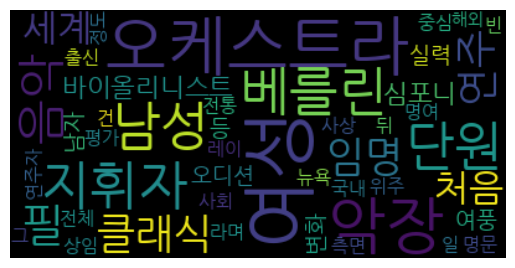

In [24]:
from wordcloud import WordCloud
# 단어 빈도수가 두 번 이상 나타난 단어에 대해서 wordcloud 생성
c = Counter(cleaned_noun_list)
len = 0
for key, val in c.items():
    if(val > 1) :
        len += 1
top_nouns = dict(c.most_common(len))
# print(top_nouns)

FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wordcloud = WordCloud(font_path=FONT_PATH, max_font_size = 60).generate_from_frequencies(top_nouns)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## step3 - SNA

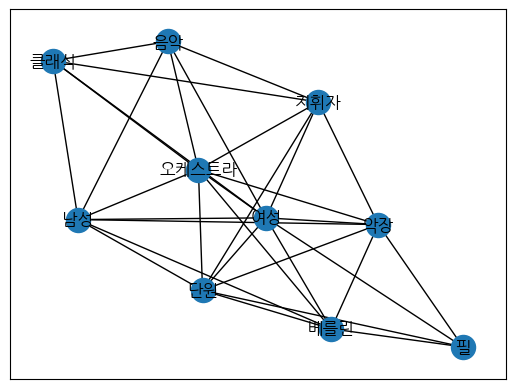

In [25]:
# SNA
c = Counter(cleaned_noun_list)
NUM_WORDS = 10
top_nouns = dict(c.most_common(NUM_WORDS))
#print(top_nouns)
unique_nouns = list(top_nouns.keys())

g = nx.Graph()
g.add_nodes_from(unique_nouns)

for pair in list(itertools.combinations(list(unique_nouns), 2)):
    if pair[0] == pair[1]:
        continue
    for sent in cleaned_sentence_list:
        if pair[0] in sent and pair[1] in sent:
            if pair in list(g.edges()) or (pair[1],pair[0]) in list(g.edges()):
                g[pair[0]][pair[1]]['weight'] += 1 # tie가 있으면 weight만 추가
            else:
                g.add_edge(pair[0], pair[1], weight=1 )

nx.draw_networkx(g, font_family='NanumGothic')

plt.show()

* 오케스트라 여성 지휘, 남자 단원 등 관계에 따라 유추 가능


In [26]:
print('연결중심도')
print(sorted(nx.degree_centrality(g).items(), key=(lambda x :x[1]), reverse=True))
print('\n매개중심도')
print(sorted(nx.betweenness_centrality(g).items(), key=(lambda x :x[1]), reverse=True))
print('\n근접중심도')
print(sorted(nx.closeness_centrality(g).items(), key=(lambda x :x[1]), reverse=True))

for item in unique_nouns:
    connected_word_list = list(g[item].keys())
    num = g[item].__len__()
    print('\n[{}]: {}개 단어와 연결:'.format(item, num), end ='')
    print(connected_word_list)

연결중심도
[('여성', 1.0), ('오케스트라', 0.8888888888888888), ('악장', 0.7777777777777777), ('남성', 0.7777777777777777), ('단원', 0.7777777777777777), ('지휘자', 0.6666666666666666), ('베를린', 0.6666666666666666), ('음악', 0.5555555555555556), ('클래식', 0.5555555555555556), ('필', 0.4444444444444444)]

매개중심도
[('여성', 0.13657407407407407), ('오케스트라', 0.05787037037037036), ('남성', 0.04629629629629629), ('악장', 0.034722222222222224), ('단원', 0.034722222222222224), ('지휘자', 0.027777777777777776), ('베를린', 0.013888888888888888), ('음악', 0.004629629629629629), ('클래식', 0.004629629629629629), ('필', 0.0)]

근접중심도
[('여성', 1.0), ('오케스트라', 0.9), ('악장', 0.8181818181818182), ('남성', 0.8181818181818182), ('단원', 0.8181818181818182), ('지휘자', 0.75), ('베를린', 0.75), ('음악', 0.6923076923076923), ('클래식', 0.6923076923076923), ('필', 0.6428571428571429)]

[여성]: 9개 단어와 연결:['오케스트라', '악장', '남성', '지휘자', '단원', '베를린', '음악', '필', '클래식']

[오케스트라]: 8개 단어와 연결:['여성', '악장', '남성', '지휘자', '단원', '베를린', '음악', '클래식']

[악장]: 7개 단어와 연결:['여성', '오케스트라', '남성', '지휘자', 